In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('crime_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   jurisdiction                                           1104 non-null   object 
 1   year                                                   1104 non-null   int64  
 2   population                                             1104 non-null   int64  
 3   murder                                                 1104 non-null   int64  
 4   rape                                                   1104 non-null   int64  
 5   robbery                                                1104 non-null   int64  
 6   agg_assault                                            1104 non-null   int64  
 7   b_e                                                    1104 non-null   int64  
 8   larceny_theft                                   

In [4]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [5]:
df.columns

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_peo

In [6]:
df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
Aggravated Assault                                       False
Breaking & Entering                                      False
larceny_theft                                            False
Motor Vehicle Theft                                      False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Drop rows with missing values
data = data.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5701357466063348
Classification Report:
                        precision    recall  f1-score   support

       Allegany County       1.00      0.62      0.77         8
   Anne Arundel County       0.80      0.80      0.80        15
        Baltimore City       0.88      0.88      0.88         8
      Baltimore County       0.50      0.12      0.20         8
        Calvert County       0.67      0.44      0.53         9
       Caroline County       0.33      0.22      0.27         9
        Carroll County       0.50      0.44      0.47         9
          Cecil County       0.62      0.62      0.62        13
        Charles County       0.14      0.14      0.14         7
     Dorchester County       0.50      0.56      0.53         9
      Frederick County       0.56      0.45      0.50        11
        Garrett County       0.73      1.00      0.85        11
        Harford County       0.62      0.56      0.59         9
         Howard County       0.75      0.55      0.

No Information Rate: 0.013574660633484163
Kappa Value: 0.5495795074229812


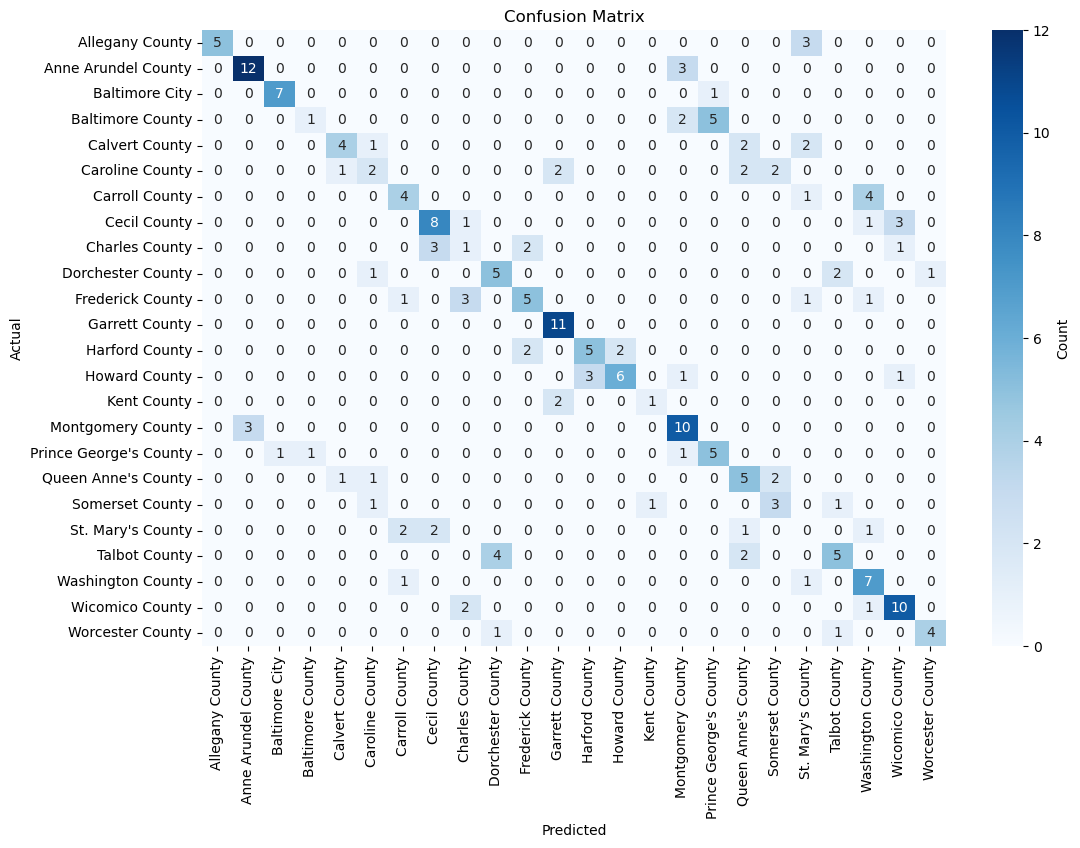

In [8]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

# Calculate No Information Rate
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
no_info_rate = dummy_clf.score(X_test, y_test)
print(f"No Information Rate: {no_info_rate}")

# Calculate Kappa Value
kappa_value = cohen_kappa_score(y_test, y_pred)
print(f"Kappa Value: {kappa_value}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Reorder Confusion Matrix
order = np.unique(y_test)
conf_matrix_df = pd.DataFrame(conf_matrix, index=order, columns=order)

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
# Save Train Data to CSV
train_csv_path = 'train_data.csv'
X_train.to_csv(train_csv_path, index=False)

print("Train Data:")
train_data = pd.read_csv(train_csv_path)
train_data





Train Data:


,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,grand_total,...,overall_crime_rate_per_100_000_people,violent_crime_rate_per_100_000_people,property_crime_rate_per_100_000_people,murder_per_100_000_people,rape_per_100_000_people,robbery_per_100_000_people,agg_assault_per_100_000_people,b_e_per_100_000_people,larceny_theft_per_100_000_people,m_v_theft_per_100_000_people
0,2015,149573,9,30,121,293,809,1974,175,3411,...,2280.5,302.9,1977.6,6.0,20.1,80.9,195.9,540.9,1319.8,117.0
1,2001,30214,0,14,25,123,247,548,67,1024,...,3389.2,536.2,2853.0,0.0,46.3,82.7,407.1,817.5,1813.7,221.8
2,1989,120554,1,31,41,225,700,2020,126,3144,...,2608.0,247.2,2360.8,0.8,25.7,34.0,186.6,580.7,1675.6,104.5
3,1991,125394,5,24,34,90,623,2465,185,3426,...,2732.2,122.0,2610.2,4.0,19.1,27.1,71.8,496.8,1965.8,147.5
4,1977,82102,3,7,32,85,592,1390,102,2211,...,2693.0,154.7,2538.3,3.7,8.5,39.0,103.5,721.1,1693.0,124.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,1981,115420,4,15,76,345,1285,2790,181,4696,...,4068.6,381.2,3687.4,3.5,13.0,65.8,298.9,1113.3,2417.3,156.8
879,2004,634279,276,182,4085,7199,8022,21819,6731,48314,...,7617.2,1851.2,5765.9,43.5,28.7,644.0,1135.0,1264.7,3440.0,1061.2
880,2007,92169,5,42,230,533,1070,2746,191,4817,...,5226.3,878.8,4347.4,5.4,45.6,249.5,578.3,1160.9,2979.3,207.2
881,2012,52011,1,16,31,138,432,1751,33,2402,...,4618.3,357.6,4260.6,1.9,30.8,59.6,265.3,830.6,3366.6,63.4


In [10]:
# Save Test Data to CSV
test_csv_path = 'test_data.csv'
X_test.to_csv(test_csv_path, index=False)
print("\nTest Data:")
test_data = pd.read_csv(test_csv_path)
test_data


Test Data:


,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,grand_total,...,overall_crime_rate_per_100_000_people,violent_crime_rate_per_100_000_people,property_crime_rate_per_100_000_people,murder_per_100_000_people,rape_per_100_000_people,robbery_per_100_000_people,agg_assault_per_100_000_people,b_e_per_100_000_people,larceny_theft_per_100_000_people,m_v_theft_per_100_000_people
0,2008,170347,1,21,40,298,597,2172,124,3253,...,1909.6,211.3,1698.3,0.6,12.3,23.5,174.9,350.5,1275.0,72.8
1,2004,88155,5,32,205,550,914,2715,185,4606,...,5224.9,898.4,4326.5,5.7,36.3,232.5,623.9,1036.8,3079.8,209.9
2,1988,95856,5,19,58,407,892,2391,386,4158,...,4337.8,510.1,3827.6,5.2,19.8,60.5,424.6,930.6,2494.4,402.7
3,2012,239031,1,50,131,438,675,3105,198,4598,...,1923.6,259.4,1664.2,0.4,20.9,54.8,183.2,282.4,1299.0,82.8
4,2020,28797,2,8,1,53,66,215,12,357,...,1239.7,222.2,1017.5,6.9,27.8,3.5,184.0,229.2,746.6,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2020,103796,3,32,91,370,253,1360,93,2202,...,2121.5,477.9,1643.6,2.9,30.8,87.7,356.5,243.7,1310.3,89.6
217,2020,168032,5,36,19,127,164,974,48,1373,...,817.1,111.3,705.8,3.0,21.4,11.3,75.6,97.6,579.7,28.6
218,1991,123385,2,35,58,264,766,2296,184,3605,...,2921.7,291.0,2630.8,1.6,28.4,47.0,214.0,620.8,1860.8,149.1
219,1979,26841,3,4,13,57,266,673,43,1059,...,3945.5,286.9,3658.6,11.2,14.9,48.4,212.4,991.0,2507.4,160.2
